In [22]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import datetime

In [23]:
def format_x_axis(ax):
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    ax.tick_params(axis='x', labelrotation=45)

# ARMA and friends

The models we describe in this notebook can be called *classical models*, as they have been worked out at the beginnig of the previous century and therefore have a longer tradition than more recent statistical models.

Many time-series exhibit trends and seasonality, while many others assume stationarity. If a time-series is stationary, tis mean and standard deviation stays constant over time. This implies that the time-series has no trend and no cyclic variability. Therefor the removal of irregular components, trends, and seasonal fluctuations is an intrinsic aspect of applying these models. The models then forecast what's left after this removal: business cycles.

To apply these classical models, a time-series usually should be decomposed into different components. This is usually done as follows:

1. Test for stationarity
2. Differencing (if stationarity is detected)
3. Fit model and forecast
4. Add back the trends and seasonality

## Moving Average

The *Moving Average* (MA), the unweighted mean over a period of $k$ points, is defined as follows:

$$
MA = \frac{1}{k}\Sigma_{i=1}^{k}x_i
$$ 

where $x_i$ is the observed time-series.

The MA can be used to smooth out a time-series, thereby removing noise and periodic fluctuations that occur in the short term, effectively working as a low-pass filter. We have seen this in our [`demo_univariate_modelling`-notebook](demo_univariate_modelling.ipynb').

In [29]:
df = pd.read_csv('../data/btc.csv', names=['date','value'], skiprows=1, parse_dates=[0])
df['avg'] = df['value'].rolling(30).mean()
#df.info()
df.head()

,date,value,avg
0,2017-12-31,14156.400391,NaN
1,2018-01-01,13657.200195,NaN
2,2018-01-02,14982.099609,NaN
3,2018-01-03,15201.000000,NaN
4,2018-01-04,15599.200195,NaN


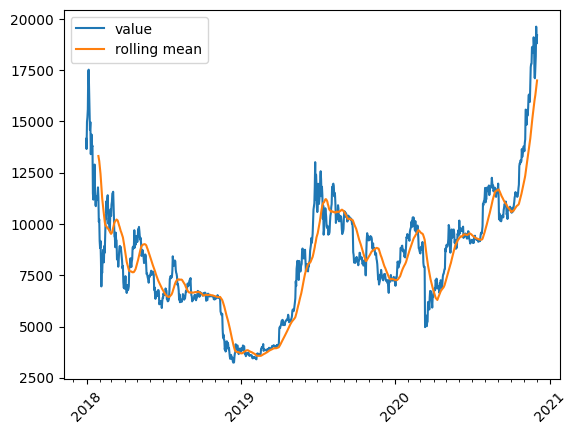

In [31]:
fig, ax = plt.subplots()
format_x_axis(ax)
ax.plot(df['date'], df['value'], label='value')
ax.plot(df['date'], df['avg'], label='rolling mean')

ax.legend()
plt.show()

We can also use MA to forecast into the future as well. The time-series is a linear regression of the current value of the series against observed values. For this to work, we can use the [*Autoregressive Model*](https://en.wikipedia.org/wiki/Autoregressive_model), which regresses the variable on its own lagged values: the current value of the value is driven by immediately preceding values using a linear combination. This way we get an *autoregressive–moving-average* or ARMA-model. 

In general, the formula for the autocorrelation at lag $k$ is

$$
r_k = \frac{\Sigma_{i=1}^{n-k}(X_i - \bar{X})(X_{i+k} - \bar{X})}{\Sigma_{i=1}^{n}(X_i - \bar{X})^2}
$$

Suppose we have a *very small* timeseries, of only two values: $[3,2]$. Note that in this case $\bar{X} = 5/2 = 2.5$, and that the variance (the denominator of the equation above) is $(3-2.5)^2 + (5-2.5)^2 = 0.5^2+(−0.5)^2=0.25+0.25=0.5$. 

The autocorrelation for lag 0 is always one, as a series correlates perfectly with itself:

$$
r_0 = \frac{\Sigma(X_i - \bar{X})^2}{\Sigma(X_i - \bar{X})^2} = 1
$$


For lag 1, we take the first value again ($X_1=3$) and compare that with the second value ($X_2 = 2$):

$$
r_1 = \frac{(3 - 2.5)(2 - 2.5)}{0.5} 
= \frac{(0.5)(-0.5)}{0.5} = \frac{0.25}{0.5} = -0.5
$$

There are no more lags, so this will be our whole autocorrelation. Let's see this in code.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.api import qqplot

In [ ]:
X = [3,2]

statsmodels.tsa.stattools.acf(X)

Now let's see how this works in a more realistic scenario.

In [ ]:
dta = sm.datasets.sunspots.load_pandas().data
#dta.head()

In [ ]:
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]

In [ ]:
dta.plot(figsize=(12, 8))

In [ ]:
# plot an autocorrelation function (ACF) 
# and a partion autocorrelation function (PACF) plot

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)